### [Stochastic Gradient Descent (SGD)](https://scikit-learn.org/stable/modules/sgd.html)
- A simple & efficient training algorithm
- Not the *only* one out there. For example, `SGDClassifier(loss='log')` is equivalent to Logistic Regression fitted via SGD.

### [SGD Classification](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
- Accepts two input arrays: training data `X (#samples,#features)` and targets (labels) `y (#labels)`.

In [1]:
from sklearn.linear_model import SGDClassifier
X,y = [[0.0, 0.0], [1.0, 1.0]], [0.0, 1.0]

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
clf.fit(X, y)
print(clf.coef_) # model params
print(clf.intercept_) # offset/bias
print(clf.predict([[2.0,2.0]])) # predicting new values

[[9.85221675 9.85221675]]
[-9.97004991]
[1.]


- `fit_intercept` tells the model whether to use an intercept (a biased hyperplane).
- `decision_function` (a method) returns the *signed distance to the hyperplane* (the dot product between the coefficients & the input sample - plus the intercept.)

In [2]:
clf.decision_function([[2.0, 2.0]])

array([29.43881708])

- `loss` sets the loss function for the model. options:
    - `loss="hinge"` - linear support vector machine
    - `loss="modified_huber"` - hinge loss (smoothed)
    - `loss="log"` - logistic regression
    
- Using `log` and `modified_huber` loss functions enables the `predict_proba` method - which returns a vector of probability estimates per sample x: $P(y|x)$

In [3]:
clf = SGDClassifier(loss="log_loss", max_iter=25).fit(X, y)
clf.predict_proba([[1., 1.]])

array([[0.00416343, 0.99583657]])

- L1 & L2 norm penalties are set using `penalty`:
    - `penalty="l2"`: L2 norm penalty used on coef_.
    - `penalty="l1"`: L1 norm penalty used on coef_.
    - `penalty="elasticnet"`: convex combination of L1 & L2 norm penalties.
    
- The default is `penalty=l2"`.
- `l1_ratio` controls the convex L1/L2 penalty combination.

### Multiclass Classification
- Implemented with a one-vs-all (OVA) scheme. A binary classifier is trained on each of K classes vs all other (K-1) classes.
- The *confidence score* (the signed distance to the hyperplane) is found for each classifier; the class with the highest score is returned.

### [example: Multiclass SGD - Iris dataset](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

In [5]:
iris   = datasets.load_iris()
X      = iris.data[:, :2] # use only first two features.
y      = iris.target
colors = "bry"
idx    = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx) # shuffle
X      = X[idx]
y      = y[idx]
mean   = X.mean(axis=0)
std    = X.std(axis=0)
X      = (X - mean) / std # standardize

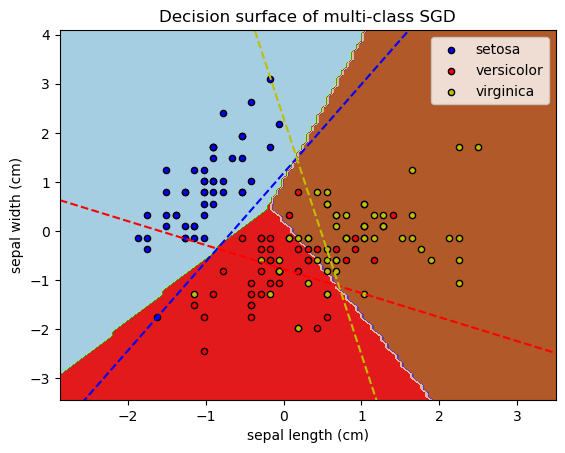

In [7]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        #clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

### [SGD: weighted samples](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_weighted_samples.html#sphx-glr-auto-examples-linear-model-plot-sgd-weighted-samples-py)
- SGDClassifier supports weighted classes (via `class_weight`) and instances (via `sample_weight`).

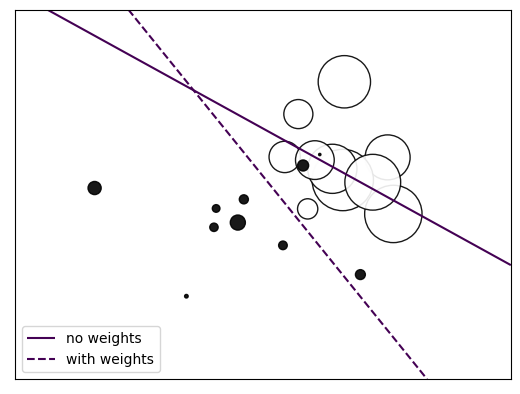

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10

# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
fig, ax = plt.subplots()
ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=sample_weight,
    alpha=0.9,
    cmap=plt.cm.bone,
    edgecolor="black",
)

# fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["solid"])

# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["dashed"])

no_weights_handles, _ = no_weights.legend_elements()
weights_handles, _ = samples_weights.legend_elements()
ax.legend(
    [no_weights_handles[0], weights_handles[0]],
    ["no weights", "with weights"],
    loc="lower left",
)

ax.set(xticks=(), yticks=())
plt.show()

### Averaged SGD
- SGDClassifier supports averaged SGD (ASGD) via `average=True`.
- ASGD computes the same updates as SGD, except that `coef_` is set to the **average** coefficient values across all updates. (The same distinction happens with `intercept_`.)
- ASGD can result in accelerated learning rates = learning rate speedups.

### [Example: Solver comparison](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html#sphx-glr-auto-examples-linear-model-plot-sgd-comparison-py)
- compares SGD, ASGD, Perceptron, Passive-Aggressive I/II, SAG

In [9]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import SGDClassifier as SGC
from sklearn.linear_model import Perceptron as PERCEPT
from sklearn.linear_model import PassiveAggressiveClassifier as PAC
from sklearn.linear_model import LogisticRegression as LR


In [10]:
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
X, y = datasets.load_digits(return_X_y=True)

In [11]:
classifiers = [
    ("SGD",           SGC(max_iter=100)),
    ("ASGD",          SGC(average=True)),
    ("Perceptron",    PERCEPT()),
    ("Pasv-Agrsv I",  PAC(loss='hinge', C=1.0, tol=1e-4)),
    ("Pasv-Agrsv II", PAC(loss='squared_hinge', C=1.0, tol=1e-4)),
    ("SAG",           LR(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

training SGD
training ASGD
training Perceptron
training Pasv-Agrsv I
training Pasv-Agrsv II
training SAG


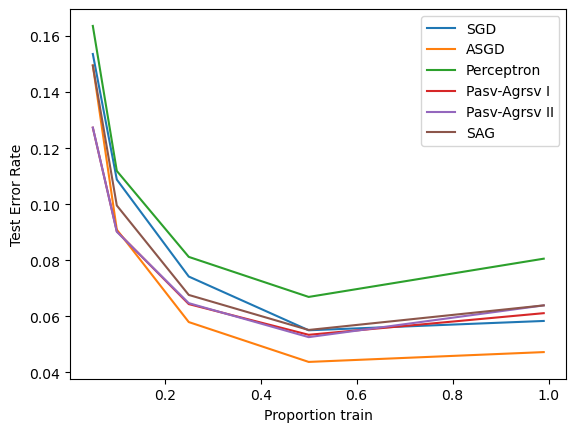

In [12]:
xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                TTS(X, y, test_size=i, random_state=rng)
            
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

### [SGD Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)
- Implementation that supports various loss functions & penalties
- Well suited for regression problems with >10K training samples
- Loss function options:
    - `loss="squared_loss"`: ordinary least squares regression
    - `loss="huber"`: huber loss for robust regression
    - `loss="epsilon_insensitive`: linear support vector regression
- `penalty` controls regularization (same options as in classification)
- Averaged SGD (ASGD) is supported.
- Stochastic Average Gradient (SAG) is supported.

In [13]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y   = rng.randn(n_samples)
X   = rng.randn(n_samples, n_features)

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

### SGD & Sparse Data
- Built-in support using data from scipy.sparse.
- For max efficiency, use [CSR matrix format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)
- See [text doc classification example](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py)

### Computational Complexity
- Major advantage of SGD: near-linear relationship with #training samples

### Stopping & Convergence
- SGD Classifier & Regressor methods support two ways to stop when a given level of convergence is reached:
    - `early_stopping=True`: stopping criteria is based on the prediction score (`score`) found on the validation set.
    - `early_stopping=False`: model is fitted on entire input dataset. Stopping is based on the objective function found on the training dataset.
- Stopping criteria is evaluated once per epoch. The algorithm stops when the criterion does not improve by `n_iter_no_change` consecutive times.
- The algorithm stops regardless after a max #iterations `max_iter`.

### Tips
- **scale your data**. Easily done using `StandardScaler`.
- Find a reasonable regularization term $\alpha$ with automatic parameter search (GridSearchCV or RandomizedSearchCV). Consider using a range similar to 10.0**-np.arange(1,7)
- SGD typically converges after ~10^6 training samples.
- If applying SGD to extracted features (for example, using PCA), *consider scaling feature values by a constant `c` such that the average L2 norm of the training data equals one.*
